# Histogram of line ratio for HNCO compared to CS, SiO, and HC3N (colored by PV description) 
### Claire E. Cook (2025)

In [1]:
import os, glob
from pathlib import Path

import numpy as np
import pylab
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table

import matplotlib.colors as mc
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import colors
from matplotlib.colors import Normalize
import matplotlib.cm as cm


from scipy.interpolate import NearestNDInterpolator
from scipy import stats
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
from astropy.coordinates import Angle, SkyCoord, Longitude
from astropy.nddata.utils import Cutout2D
import astropy.units as u
from astropy.wcs.utils import pixel_to_skycoord
import astropy.io.fits as pyfits


from regions import Regions
from spectral_cube import SpectralCube
from spectral_cube import Projection

In [2]:
#Paths and definitions
ratiodir = '/Users/clairecook/CMZ-Central20pc/EVFs/DATATEST/RatioMaps/' #Dir where ratio maps are, w/ folders for each EVF
catpath = '/Users/clairecook/CMZ-Central20pc/EVFs/DATATEST/Chemistry/RatioMap_Stats_AllEVFs.txt' #Path for EVF ratio map stats catalog

In [3]:
#Get array of all EVF's we have line ratio maps made for
source_names = [] #array for source names/folder names
for folder in os.listdir(ratiodir): #goes through source name folders in ratiodir & saves the names to an array
    foldername = os.fsdecode(folder)
    if foldername.startswith('.'): #avoids hidden files/folders
        pass
    else: 
        source_names.append(foldername)
print(len(source_names), 'EVFs')

125 EVFs


In [5]:
evftablepath = '/Users/clairecook/CMZ-Central20pc/EVFs/DATATEST/Identification/TILES_TABLES/EVF Table with PV Classifications.csv'
evftable = Table.read(evftablepath)
#evftable.pprint_all() #prints ALL of the table without any truncation with ellipses

#Open the data into arrays for each column
X1,HN13C_CS21_Average,HN13C_CS21_Median,HN13C_CS21_StdDev,SO32_CS21_Average,SO32_CS21_Median,SO32_CS21_StdDev,SiO21_H13CN_Average,SiO21_H13CN_Median,SiO21_H13CN_StdDev,HNCO_CS21_Average,HNCO_CS21_Median,HNCO_CS21_StdDev,HN13C_H13COp_Average,HN13C_H13COp_Median,HN13C_H13COp_StdDev,SO32_SiO21_Average,SO32_SiO21_Median,SO32_SiO21_StdDev,HC3N_H13COp_Average,HC3N_H13COp_Median,HC3N_H13COp_StdDev,HC3N_HN13C_Average,HC3N_HN13C_Median,HC3N_HN13C_StdDev,HN13C_SO32_Average,HN13C_SO32_Median,HN13C_SO32_StdDev,HNCO_SO32_Average,HNCO_SO32_Median,HNCO_SO32_StdDev,SO32_H13CN_Average,SO32_H13CN_Median,SO32_H13CN_StdDev,SiO21_CS21_Average,SiO21_CS21_Median,SiO21_CS21_StdDev,H13COp_CS21_Average,H13COp_CS21_Median,H13COp_CS21_StdDev,SiO21_H13COp_Average,SiO21_H13COp_Median,SiO21_H13COp_StdDev,HNCO_HN13C_Average,HNCO_HN13C_Median,HNCO_HN13C_StdDev,HC3N_CS21_Average,HC3N_CS21_Median,HC3N_CS21_StdDev,SO32_H13COp_Average,SO32_H13COp_Median,SO32_H13COp_StdDev,HC3N_SO32_Average,HC3N_SO32_Median,HC3N_SO32_StdDev,SO21_SO32_Average,SO21_SO32_Median,SO21_SO32_StdDev,HC3N_SiO21_Average,HC3N_SiO21_Median,HC3N_SiO21_StdDev,SO21_SiO21_Average,SO21_SiO21_Median,SO21_SiO21_StdDev,HNCO_SO21_Average,HNCO_SO21_Median,HNCO_SO21_StdDev,SO21_CS21_Average,SO21_CS21_Median,SO21_CS21_StdDev,HC3N_H13CN_Average,HC3N_H13CN_Median,HC3N_H13CN_StdDev,SO21_H13CN_Average,SO21_H13CN_Median,SO21_H13CN_StdDev,HN13C_SO21_Average,HN13C_SO21_Median,HN13C_SO21_StdDev,SO21_H13COp_Average,SO21_H13COp_Median,SO21_H13COp_StdDev,HN13C_H13CN_Average,HN13C_H13CN_Median,HN13C_H13CN_StdDev,HNCO_H13CN_Average,HNCO_H13CN_Median,HNCO_H13CN_StdDev,HNCO_HC3N_Average,HNCO_HC3N_Median,HNCO_HC3N_StdDev,HN13C_SiO21_Average,HN13C_SiO21_Median,HN13C_SiO21_StdDev,HNCO_SiO21_Average,HNCO_SiO21_Median,HNCO_SiO21_StdDev,HC3N_SO21_Average,HC3N_SO21_Median,HC3N_SO21_StdDev,H13COp_H13CN_Average,H13COp_H13CN_Median,H13COp_H13CN_StdDev,HNCO_H13COp_Average,HNCO_H13COp_Median,HNCO_H13COp_StdDev,H13CN_CS21_Average,H13CN_CS21_Median,H13CN_CS21_StdDev=np.genfromtxt(catpath, dtype=float,skip_header=1,filling_values = -99.99, unpack=True)
data = np.loadtxt(catpath, dtype=str,skiprows=1, unpack=True) #for text
evf_name = data[0]



evf_num = evftable['ID_Number'].data 
l = evftable['l'].data
b = evftable['b'].data
pv_class = evftable['PV Classification spike (S), clumpy (CL), velocity bridge (VB), loop (L), curve (CU)'].data


evf_names_pvtab =[] #will be missing EVF 60 and 83, the problematic EVFs with missing line ratio maps
evf_names_stat =[]
i=0
while i<len(evf_num):
    evf_id = 'evf' + str(evf_num[i])
    evf_names_pvtab.append(evf_id)
    i+=1

#Stripping the rest of the EVF ID beyond evf00 from evf_name
i=0
while i<len(evf_name):
    array = evf_name[i].split('_')
    evf_names_stat.append(array[0])
    i+=1

col = ['#36005e','#af2650','k', '#c83942', '#da9f66', '#d8d296'] 
#magma black[0], purple[1], pink[0], red[3], orange[4], yellow[5]

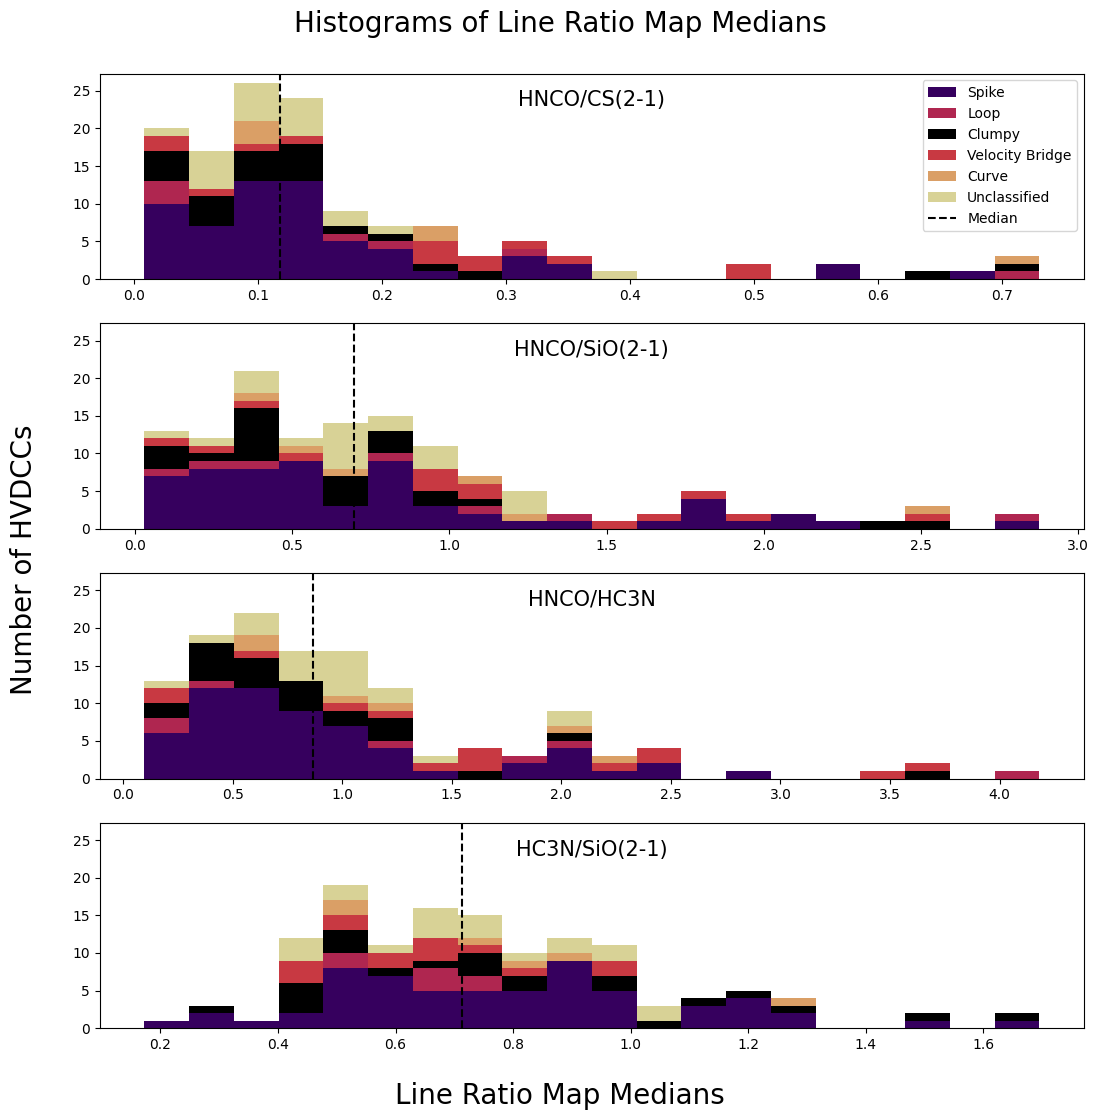

In [6]:
#Make histogram figure color-coded by PV classification
fig, axs = plt.subplots(4, sharex=False, sharey=True, figsize=(11,11))
fig.suptitle('Histograms of Line Ratio Map Medians', x=0.5,y= 1.0, fontsize=20)
fig.supxlabel("Line Ratio Map Medians", x=0.5, y=0.0, fontsize=20)
fig.supylabel("Number of HVDCCs", x=0.0, y=0.50, fontsize=20)

fig.tight_layout()



#HNCO/CS21
pv_s_med = []
pv_cl_med = []
pv_vb_med = []
pv_l_med =[]
pv_cu_med =[]


pv_un_med = [] #for unclassified ('-')
pv_2_med = [] #for those with 2 designated pv classifications

i=0
while i<len(evf_names_pvtab):
    if(evf_names_pvtab[i]=='evf60'):
        i+=1
    elif (evf_names_pvtab[i]=='evf83'):
        i+=1
    else:
        #Get what index this EVF is for evf_names_stat to be able to grab its stats
        for x in evf_names_stat:
            if x==evf_names_pvtab[i]:
                ind = evf_names_stat.index(x)
                if pv_class[i]=='S' or pv_class[i]=='S?':
                    pv_s_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='CL' or pv_class[i]=='CL?':
                    pv_cl_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='VB' or pv_class[i]=='VB?' :
                    pv_vb_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='L':
                    pv_l_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='CU':
                    pv_cu_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='-':
                    pv_un_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='S, VB?':
                    pv_s_med.append(HNCO_CS21_Median[ind])
                    pv_vb_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='S, CL?':
                    pv_s_med.append(HNCO_CS21_Median[ind])
                    pv_cl_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='CL, CU?':
                    pv_cl_med.append(HNCO_CS21_Median[ind])
                    pv_cu_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='L, VB?':
                    pv_l_med.append(HNCO_CS21_Median[ind])
                    pv_vb_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='L, S':
                    pv_l_med.append(HNCO_CS21_Median[ind])
                    pv_s_med.append(HNCO_CS21_Median[ind])
                elif pv_class[i]=='CL, CU':
                    pv_cl_med.append(HNCO_CS21_Median[ind])
                    pv_cu_med.append(HNCO_CS21_Median[ind])
                else: 
                    print(pv_class[i])
  
        i+=1


axs[0].hist([pv_s_med,pv_l_med,pv_cl_med,pv_vb_med,pv_cu_med,pv_un_med], bins=20, stacked=True,density=False, color=col, label=['Spike','Loop','Clumpy','Velocity Bridge','Curve','Unclassified'])
axs[0].axvline(x=np.median(HNCO_CS21_Median), color='k',linestyle='dashed', label='Median')

axs[0].set_title("HNCO/CS(2-1)", loc='center', y=0.8, fontsize=15)
axs[0].legend()




#HNCO/SiO21
pv_s_med = []
pv_cl_med = []
pv_vb_med = []
pv_l_med =[]
pv_cu_med =[]


pv_un_med = [] #for unclassified ('-')
pv_2_med = [] #for those with 2 designated pv classifications

i=0
while i<len(evf_names_pvtab):
    if(evf_names_pvtab[i]=='evf60'):
        i+=1
    elif (evf_names_pvtab[i]=='evf83'):
        i+=1
    else:
        #Get what index this EVF is for evf_names_stat to be able to grab its stats
        for x in evf_names_stat:
            if x==evf_names_pvtab[i]:
                ind = evf_names_stat.index(x)
                if pv_class[i]=='S' or pv_class[i]=='S?':
                    pv_s_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='CL' or pv_class[i]=='CL?':
                    pv_cl_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='VB' or pv_class[i]=='VB?' :
                    pv_vb_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='L':
                    pv_l_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='CU':
                    pv_cu_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='-':
                    pv_un_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='S, VB?':
                    pv_s_med.append(HNCO_SiO21_Median[ind])
                    pv_vb_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='S, CL?':
                    pv_s_med.append(HNCO_SiO21_Median[ind])
                    pv_cl_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='CL, CU?':
                    pv_cl_med.append(HNCO_SiO21_Median[ind])
                    pv_cu_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='L, VB?':
                    pv_l_med.append(HNCO_SiO21_Median[ind])
                    pv_vb_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='L, S':
                    pv_l_med.append(HNCO_SiO21_Median[ind])
                    pv_s_med.append(HNCO_SiO21_Median[ind])
                elif pv_class[i]=='CL, CU':
                    pv_cl_med.append(HNCO_SiO21_Median[ind])
                    pv_cu_med.append(HNCO_SiO21_Median[ind])
                else: 
                    print(pv_class[i])
                
        i+=1



axs[1].hist([pv_s_med,pv_l_med,pv_cl_med,pv_vb_med,pv_cu_med,pv_un_med], bins=20, stacked=True,density=False, color=col, label=['Spike','Loop','Clumpy','Velocity Bridge','Curve','Unclassified'])
axs[1].axvline(x=np.median(HNCO_SiO21_Median), color='k',linestyle='dashed', label='Median')


axs[1].set_title('HNCO/SiO(2-1)', loc='center', y=0.8, fontsize=15)



#HNCO/HC3N
pv_s_med = []
pv_cl_med = []
pv_vb_med = []
pv_l_med =[]
pv_cu_med =[]


pv_un_med = [] #for unclassified ('-')
pv_2_med = [] #for those with 2 designated pv classifications

i=0
while i<len(evf_names_pvtab):
    if(evf_names_pvtab[i]=='evf60'):
        i+=1
    elif (evf_names_pvtab[i]=='evf83'):
        i+=1
    else:
        #Get what index this EVF is for evf_names_stat to be able to grab its stats
        for x in evf_names_stat:
            if x==evf_names_pvtab[i]:
                ind = evf_names_stat.index(x)
                if pv_class[i]=='S' or pv_class[i]=='S?':
                    pv_s_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='CL' or pv_class[i]=='CL?':
                    pv_cl_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='VB' or pv_class[i]=='VB?' :
                    pv_vb_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='L':
                    pv_l_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='CU':
                    pv_cu_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='-':
                    pv_un_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='S, VB?':
                    pv_s_med.append(HNCO_HC3N_Median[ind])
                    pv_vb_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='S, CL?':
                    pv_s_med.append(HNCO_HC3N_Median[ind])
                    pv_cl_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='CL, CU?':
                    pv_cl_med.append(HNCO_HC3N_Median[ind])
                    pv_cu_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='L, VB?':
                    pv_l_med.append(HNCO_HC3N_Median[ind])
                    pv_vb_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='L, S':
                    pv_l_med.append(HNCO_HC3N_Median[ind])
                    pv_s_med.append(HNCO_HC3N_Median[ind])
                elif pv_class[i]=='CL, CU':
                    pv_cl_med.append(HNCO_HC3N_Median[ind])
                    pv_cu_med.append(HNCO_HC3N_Median[ind])
                else: 
                    print(pv_class[i])
                
        i+=1

axs[2].hist([pv_s_med,pv_l_med,pv_cl_med,pv_vb_med,pv_cu_med,pv_un_med], bins=20, stacked=True,density=False, color=col, label=['Spike','Loop','Clumpy','Velocity Bridge','Curve','Unclassified'])
axs[2].axvline(x=np.median(HNCO_HC3N_Median), color='k',linestyle='dashed', label='Median')


axs[2].set_title('HNCO/HC3N', loc='center', y=0.8, fontsize=15)



#HC3N/SiO21
pv_s_med = []
pv_cl_med = []
pv_vb_med = []
pv_l_med =[]
pv_cu_med =[]


pv_un_med = [] #for unclassified ('-')
pv_2_med = [] #for those with 2 designated pv classifications

i=0
while i<len(evf_names_pvtab):
    if(evf_names_pvtab[i]=='evf60'):
        i+=1
    elif (evf_names_pvtab[i]=='evf83'):
        i+=1
    else:
        #Get what index this EVF is for evf_names_stat to be able to grab its stats
        for x in evf_names_stat:
            if x==evf_names_pvtab[i]:
                ind = evf_names_stat.index(x)
                if pv_class[i]=='S' or pv_class[i]=='S?':
                    pv_s_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='CL' or pv_class[i]=='CL?':
                    pv_cl_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='VB' or pv_class[i]=='VB?' :
                    pv_vb_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='L':
                    pv_l_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='CU':
                    pv_cu_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='-':
                    pv_un_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='S, VB?':
                    pv_s_med.append(HC3N_SiO21_Median[ind])
                    pv_vb_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='S, CL?':
                    pv_s_med.append(HC3N_SiO21_Median[ind])
                    pv_cl_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='CL, CU?':
                    pv_cl_med.append(HC3N_SiO21_Median[ind])
                    pv_cu_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='L, VB?':
                    pv_l_med.append(HC3N_SiO21_Median[ind])
                    pv_vb_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='L, S':
                    pv_l_med.append(HC3N_SiO21_Median[ind])
                    pv_s_med.append(HC3N_SiO21_Median[ind])
                elif pv_class[i]=='CL, CU':
                    pv_cl_med.append(HC3N_SiO21_Median[ind])
                    pv_cu_med.append(HC3N_SiO21_Median[ind])
                else: 
                    print(pv_class[i])
                
                
        i+=1
axs[3].hist([pv_s_med,pv_l_med,pv_cl_med,pv_vb_med,pv_cu_med,pv_un_med], bins=20, stacked=True,density=False, color=col, label=['Spike','Loop','Clumpy','Velocity Bridge','Curve','Unclassified'])
axs[3].axvline(x=np.median(HC3N_SiO21_Median), color='k',linestyle='dashed', label='Median')


axs[3].set_title('HC3N/SiO(2-1)', loc='center', y=0.8, fontsize=15)

plt.show()